In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/quora_question_pairs/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df = df.sample(50000)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
365274,365274,269872,169634,Which are the best online resources for learni...,What are the best online resources to learn vi...,1
275466,275466,394289,394290,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...,0
220417,220417,327508,327509,What are the best online news portal?,Which is the best online news portal?,1
260246,260246,296458,88366,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?,1
305310,305310,132249,205272,How was speed of light calculated?,How is speed of light calculated?,1


In [4]:
# df = df.sample(30000,random_state=2)
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
df.duplicated().sum()

0

is_duplicate
0    31475
1    18525
Name: count, dtype: int64
is_duplicate
0    62.95
1    37.05
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

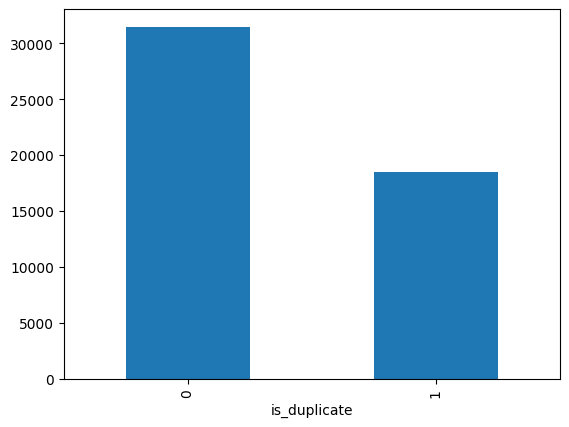

In [6]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 88933
Number of questions getting repeated 7320


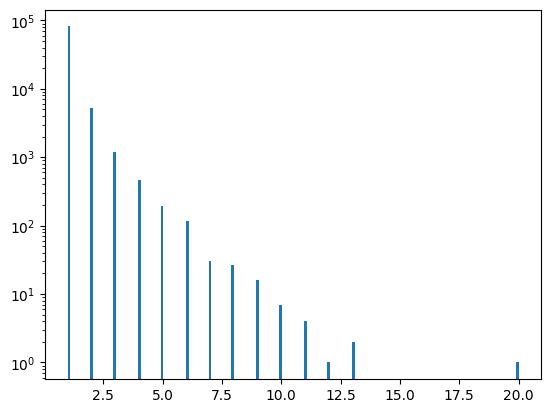

In [8]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [9]:
# Feature Engineering

df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()

In [10]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
365274,365274,269872,169634,Which are the best online resources for learni...,What are the best online resources to learn vi...,1,70,51
275466,275466,394289,394290,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...,0,150,52
220417,220417,327508,327509,What are the best online news portal?,Which is the best online news portal?,1,37,37
260246,260246,296458,88366,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?,1,42,39
305310,305310,132249,205272,How was speed of light calculated?,How is speed of light calculated?,1,34,33


In [11]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
365274,365274,269872,169634,Which are the best online resources for learni...,What are the best online resources to learn vi...,1,70,51,12,9
275466,275466,394289,394290,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...,0,150,52,25,11
220417,220417,327508,327509,What are the best online news portal?,Which is the best online news portal?,1,37,37,7,7
260246,260246,296458,88366,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?,1,42,39,9,8
305310,305310,132249,205272,How was speed of light calculated?,How is speed of light calculated?,1,34,33,6,6


In [12]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [13]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
365274,365274,269872,169634,Which are the best online resources for learni...,What are the best online resources to learn vi...,1,70,51,12,9,5
275466,275466,394289,394290,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...,0,150,52,25,11,5
220417,220417,327508,327509,What are the best online news portal?,Which is the best online news portal?,1,37,37,7,7,5
260246,260246,296458,88366,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?,1,42,39,9,8,6
305310,305310,132249,205272,How was speed of light calculated?,How is speed of light calculated?,1,34,33,6,6,5


In [14]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [15]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
365274,365274,269872,169634,Which are the best online resources for learni...,What are the best online resources to learn vi...,1,70,51,12,9,5,21
275466,275466,394289,394290,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...,0,150,52,25,11,5,35
220417,220417,327508,327509,What are the best online news portal?,Which is the best online news portal?,1,37,37,7,7,5,14
260246,260246,296458,88366,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?,1,42,39,9,8,6,17
305310,305310,132249,205272,How was speed of light calculated?,How is speed of light calculated?,1,34,33,6,6,5,12


In [16]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
365274,365274,269872,169634,Which are the best online resources for learni...,What are the best online resources to learn vi...,1,70,51,12,9,5,21,0.24
275466,275466,394289,394290,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...,0,150,52,25,11,5,35,0.14
220417,220417,327508,327509,What are the best online news portal?,Which is the best online news portal?,1,37,37,7,7,5,14,0.36
260246,260246,296458,88366,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?,1,42,39,9,8,6,17,0.35
305310,305310,132249,205272,How was speed of light calculated?,How is speed of light calculated?,1,34,33,6,6,5,12,0.42


minimum characters 1
maximum characters 391
average num of characters 59


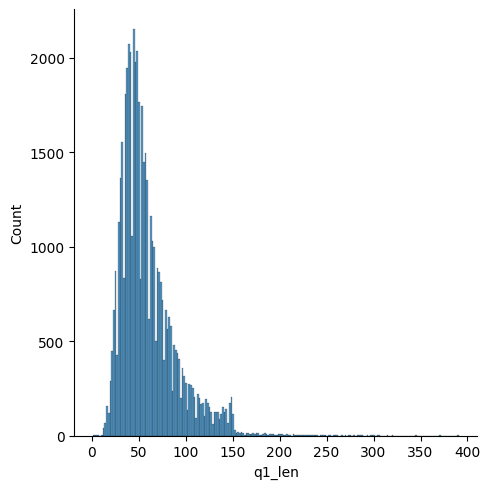

In [17]:
# Analysis of features
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


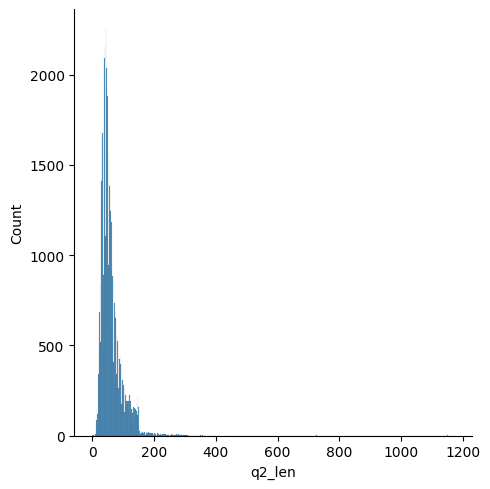

In [18]:
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


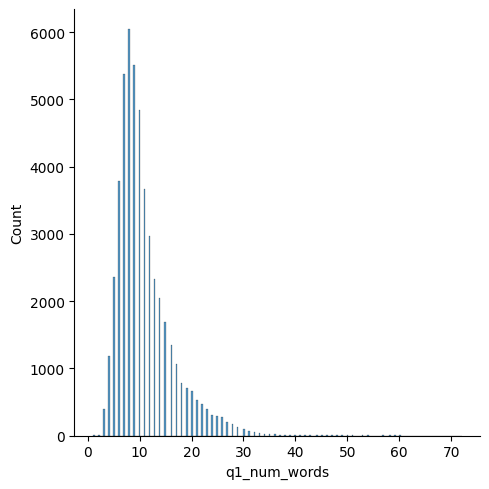

In [19]:
sns.displot(df['q1_num_words'])
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',int(df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


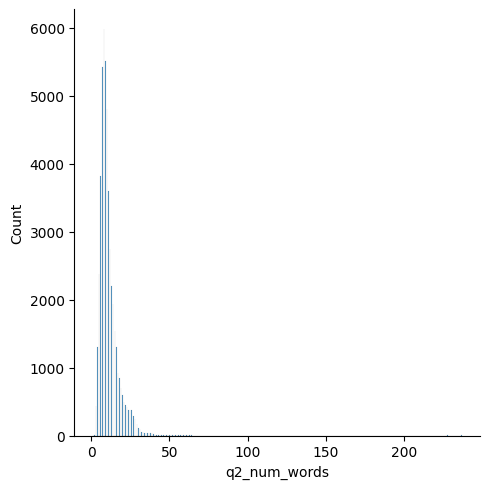

In [20]:
sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

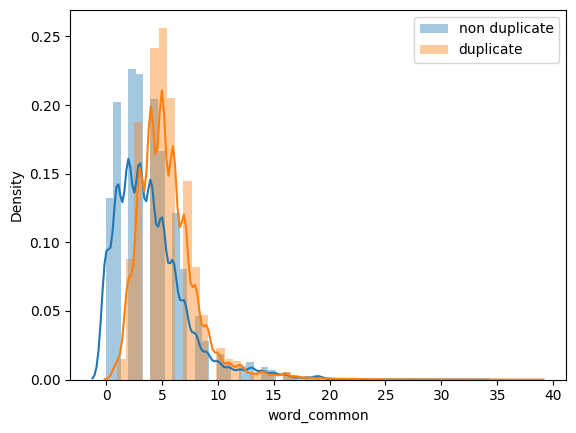

In [21]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

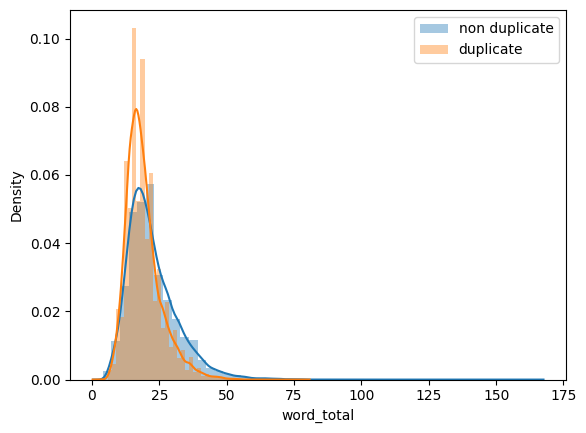

In [22]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

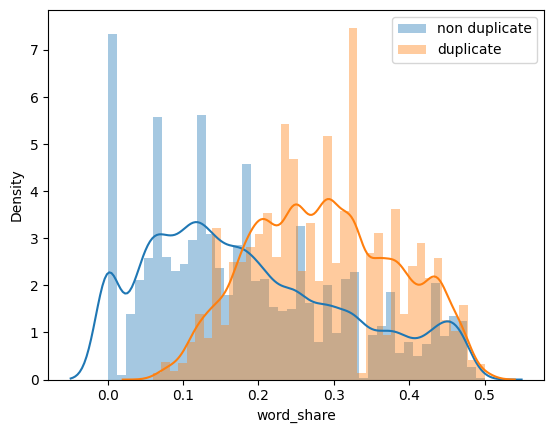

In [23]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [24]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
365274,Which are the best online resources for learni...,What are the best online resources to learn vi...
275466,Where can I find a freelance or SME UX/UI desi...,Is Quikr a good company to work as a UX/UI des...
220417,What are the best online news portal?,Which is the best online news portal?
260246,How do I get rid of my WhatsApp addiction?,How do I get rid addiction of WhatsApp?
305310,How was speed of light calculated?,How is speed of light calculated?


In [25]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
365274,1,70,51,12,9,5,21,0.24
275466,0,150,52,25,11,5,35,0.14
220417,1,37,37,7,7,5,14,0.36
260246,1,42,39,9,8,6,17,0.35
305310,1,34,33,6,6,5,12,0.42


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [30]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [31]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [32]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
365274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
365274,1,70,51,12,9,5,21,0.24,0,0,...,0,0,0,0,0,0,0,0,0,0
275466,0,150,52,25,11,5,35,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0
220417,1,37,37,7,7,5,14,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
260246,1,42,39,9,8,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
305310,1,34,33,6,6,5,12,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred = rf.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.7854

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = xgb.predict(X_test)

In [43]:

accuracy_score(y_test,y_pred)

0.7708

### **Advanced Features**

1. **Token Features**
    - `cwc_min`: Ratio of common words to length of smaller question
    - `cwc_max`: Ratio of common words to length of larger question
    - `csc_min`: Ratio of common stop words to smaller stop word count
    - `csc_max`: Ratio of common stop words to larger stop word count
    - `ctc_min`: Ratio of common tokens to smaller token count
    - `ctc_max`: Ratio of common tokens to larger token count
    - `last_word_eq`: 1 if last word in both questions is same, 0 otherwise
    - `first_word_eq`: 1 if first word in both questions is same, 0 otherwise

2. **Length Based Features**
    - `mean_len`: Mean length of the two questions (number of words)
    - `abs_len_diff`: Absolute difference between the lengths of the two questions (number of words)
    - `longest_substr_ratio`: Ratio of length of longest substring among the two questions to length of smaller question

3. **Fuzzy Features**
    - `fuzz_ratio`: Fuzz ratio score from fuzzywuzzy
    - `fuzz_partial_ratio`: Fuzz partial ratio from fuzzywuzzy
    - `token_sort_ratio`: Token sort ratio from fuzzywuzzy
    - `token_set_ratio`: Token set ratio from fuzzywuzzy